In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [4]:
console = pd.read_csv(r"data\best_selling_consoles.csv")
games = pd.read_csv(r"data\video_games_sales.csv")

In [5]:
games.columns


Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
games.isna().sum()


rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [8]:
games.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
games.tail(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [10]:
games.columns = games.columns.str.title() .str.strip() .str.replace('_', ' ')

In [11]:
games_clean = games.drop('Rank', axis=1)
games_clean

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
console.head(10)

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


In [13]:
console.isna().sum()

Console Name             0
Type                     0
Company                  0
Released Year            0
Discontinuation Year     0
Units sold (million)     0
Remarks                 35
dtype: int64

In [14]:
console.columns

Index(['Console Name', 'Type', 'Company', 'Released Year',
       'Discontinuation Year', 'Units sold (million)', 'Remarks'],
      dtype='object')

In [15]:
console_clean = console.drop('Remarks', axis=1)

In [16]:
console_clean = console_clean.rename(columns={'Console Name': 'Platform'})
console_clean

,Platform,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,PlayStation 2,Home,Sony,2000,2013,155.00
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55
3,Game Boy,Handheld,Nintendo,1989,2003,64.42
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06
5,PlayStation 4,Home,Sony,2013,0,117.20
6,PlayStation,Home,Sony,1994,2006,102.49
7,Wii,Home,Nintendo,2006,2013,101.63
8,PlayStation 3,Home,Sony,2006,2017,87.40
9,Xbox 360,Home,Microsoft,2005,2016,84.00


In [17]:
console_clean['Platform'].unique()

array(['PlayStation 2', 'Nintendo DS', 'Nintendo Switch', 'Game Boy',
       'Game Boy Color', 'PlayStation 4', 'PlayStation', 'Wii',
       'PlayStation 3', 'Xbox 360', 'Game Boy Advance',
       'PlayStation Portable', 'Nintendo 3DS', 'NES/Famicom', 'Xbox One',
       'SNES/Super Famicom', 'Game & Watch', 'Nintendo 64',
       'Sega Genesis/Mega Drive', 'PlayStation 5', 'Atari 2600', 'Xbox',
       'GameCube', 'Xbox Series X/S', 'Wii U', 'PlayStation Vita',
       'Sega Master System', 'Sega Game Gear', 'PC Engine/TurboGrafx-16',
       'Sega Saturn', 'Dreamcast', 'Master System(Brazilian variants)',
       'Dendy(Famiclone)', 'Super NES Classic Edition',
       'Famicom Disk System', 'NES Classic Edition', 'WonderSwan',
       'Sega Pico', 'Color TV-Game', 'Intellivision',
       'Mega Drive(Brazilian variants)', 'N-Gage', 'Sega CD',
       'ColecoVision', 'Magnavox Odyssey', 'PC Engine CD-ROM',
       'Atari 7800', 'Atari Lynx', 'Philips CD-i', 'Telstar',
       'Atari 5200'], dtyp

In [18]:
games_clean['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
platform_matching ={
    'NES': 'NES/Famicom',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'SNES/Super Famicom',
    'GBA': 'Game Boy Advance',
    '3DS': 'Nintendo 3DS',
    'PS4': 'PlayStation 4',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'GC':'GameCube',
    'WiiU':'Wii U',
    'GEN':'Sega Genesis/Mega Drive',
    'DC': 'DreamCast',
    'PSV': 'PlayStation 5',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS':'Wonderswan',
    'TG16': 'PC Engine/TurboGrafx-16',
    'GG':'Sega Game Gear'}


games_clean['Platform'] = games_clean['Platform'].replace(platform_matching)
games_clean

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Game Boy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GameCube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
games_console_mergered = pd.merge(games_clean, console_clean, on='Platform', how='inner')
games_console_mergered

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home,Nintendo,1983,2003,61.91
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home,Nintendo,2006,2013,101.63
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home,Nintendo,2006,2013,101.63
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,Nintendo,1989,2003,64.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15559,Woody Woodpecker in Crazy Castle 5,Game Boy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Handheld,Nintendo,2001,2010,81.51
15560,Men in Black II: Alien Escape,GameCube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Home,Nintendo,2001,2007,21.74
15561,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Home,Sony,2000,2013,155.00
15562,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Handheld,Nintendo,2004,2013,154.02


In [21]:
cols_rename = {'Type': 'Console Type',
    'Company':'Console Manufacturer',
    'Released Year': 'Console Released',
    'Discontinuation Year': 'Console Discontinued',
    'Units sold (million)': 'Consoles Sold'}

merged_col_rename =  games_console_mergered.rename(columns=(cols_rename) )
merged_col_rename.head()

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Console Type,Console Manufacturer,Console Released,Console Discontinued,Consoles Sold
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home,Nintendo,1983,2003,61.91
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home,Nintendo,2006,2013,101.63
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home,Nintendo,2006,2013,101.63
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,Nintendo,1989,2003,64.42


In [22]:
merged_col_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15564 entries, 0 to 15563
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  15564 non-null  object 
 1   Platform              15564 non-null  object 
 2   Year                  15310 non-null  float64
 3   Genre                 15564 non-null  object 
 4   Publisher             15512 non-null  object 
 5   Na Sales              15564 non-null  float64
 6   Eu Sales              15564 non-null  float64
 7   Jp Sales              15564 non-null  float64
 8   Other Sales           15564 non-null  float64
 9   Global Sales          15564 non-null  float64
 10  Console Type          15564 non-null  object 
 11  Console Manufacturer  15564 non-null  object 
 12  Console Released      15564 non-null  int64  
 13  Console Discontinued  15564 non-null  int64  
 14  Consoles Sold         15564 non-null  float64
dtypes: float64(7), int6

In [23]:
merged_col_rename.isna().sum()

Name                      0
Platform                  0
Year                    254
Genre                     0
Publisher                52
Na Sales                  0
Eu Sales                  0
Jp Sales                  0
Other Sales               0
Global Sales              0
Console Type              0
Console Manufacturer      0
Console Released          0
Console Discontinued      0
Consoles Sold             0
dtype: int64

In [24]:
merged_col_rename['Year'] = merged_col_rename['Year'].fillna(0).astype(int)
merged_col_rename['Publisher'] = merged_col_rename['Publisher'].fillna('Unknown')

In [25]:
merged_col_rename.isna().sum()

Name                    0
Platform                0
Year                    0
Genre                   0
Publisher               0
Na Sales                0
Eu Sales                0
Jp Sales                0
Other Sales             0
Global Sales            0
Console Type            0
Console Manufacturer    0
Console Released        0
Console Discontinued    0
Consoles Sold           0
dtype: int64

In [26]:
merged_col_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15564 entries, 0 to 15563
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  15564 non-null  object 
 1   Platform              15564 non-null  object 
 2   Year                  15564 non-null  int64  
 3   Genre                 15564 non-null  object 
 4   Publisher             15564 non-null  object 
 5   Na Sales              15564 non-null  float64
 6   Eu Sales              15564 non-null  float64
 7   Jp Sales              15564 non-null  float64
 8   Other Sales           15564 non-null  float64
 9   Global Sales          15564 non-null  float64
 10  Console Type          15564 non-null  object 
 11  Console Manufacturer  15564 non-null  object 
 12  Console Released      15564 non-null  int64  
 13  Console Discontinued  15564 non-null  int64  
 14  Consoles Sold         15564 non-null  float64
dtypes: float64(6), int6

In [28]:
total_by_platform = merged_col_rename.groupby('Platform') ['Consoles Sold'] .sum()
total_by_platform

Platform
Atari 2600                   3990.00
Game Boy                     6313.16
Game Boy Advance            67001.22
GameCube                    12087.44
NES/Famicom                  6067.18
Nintendo 3DS                38653.46
Nintendo 64                 10504.67
Nintendo DS                333145.26
PC Engine/TurboGrafx-16        20.00
PlayStation                122578.04
PlayStation 2              334955.00
PlayStation 3              116154.60
PlayStation 4               39379.20
PlayStation 5               12390.00
PlayStation Portable        99466.00
SNES/Super Famicom          11734.90
Sega CD                        13.44
Sega Game Gear                 10.62
Sega Genesis/Mega Drive       830.25
Sega Saturn                  1601.98
Wii                        134659.75
Wii U                        1939.08
Xbox                        19776.00
Xbox 360                   106260.00
Xbox One                    12460.50
Name: Consoles Sold, dtype: float64

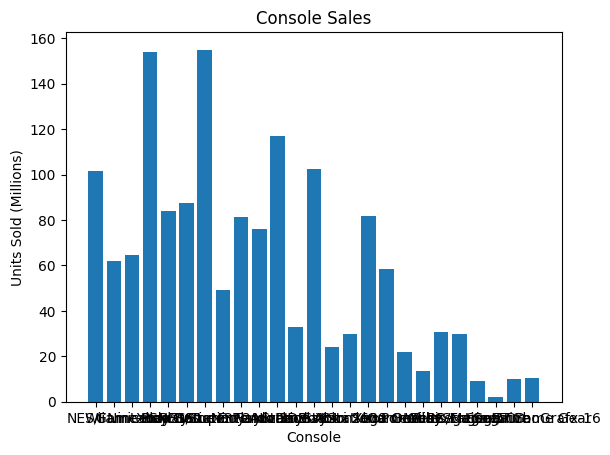

In [37]:
plt.bar(merged_col_rename['Platform'], merged_col_rename['Consoles Sold'])
plt.title('Console Sales')
plt.xlabel('Console')
plt.ylabel('Units Sold (Millions)')
plt.show()

In [31]:
merged_col_rename.to_csv('data\\cleaned_combined.csv')